In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
X_train = np.array([[1.0], [2.0]], dtype = np.float32);
Y_train = np.array([[300.0], [500.0]], dtype = np.float32);

X_train, Y_train

(array([[1.],
        [2.]], dtype=float32),
 array([[300.],
        [500.]], dtype=float32))

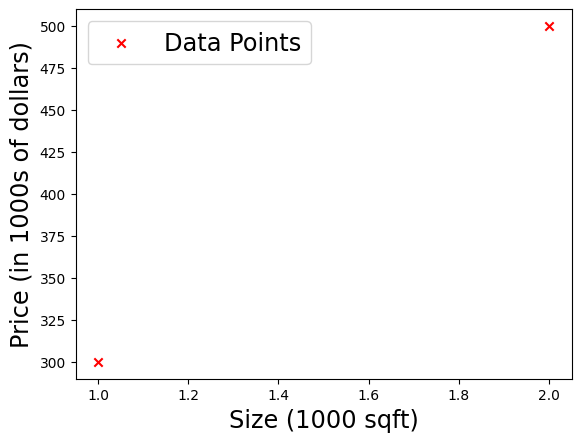

In [3]:
# Plot the values


plt.scatter(X_train, Y_train, marker = 'x', c = 'r', label = "Data Points")
plt.legend( fontsize = "xx-large")
plt.ylabel("Price (in 1000s of dollars)", fontsize = "xx-large");
plt.xlabel("Size (1000 sqft)", fontsize = "xx-large");

In [4]:
linear_layer = tf.keras.layers.Dense(units=1, activation = "linear");

linear_layer.get_weights()

[]

In [5]:
a1 = linear_layer(X_train[0].reshape(1, 1));
a1

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[1.7065946]], dtype=float32)>

In [6]:
w, b = linear_layer.get_weights();
w, b

(array([[1.7065946]], dtype=float32), array([0.], dtype=float32))

In [7]:
set_w = np.array([[200]]);
set_b = np.array([100]);

linear_layer.set_weights([set_w, set_b]);

linear_layer.get_weights();

In [8]:
a1 = linear_layer(X_train[0].reshape(1, 1));
print(a1)

alin = np.dot(set_w, X_train[0].reshape(1, 1)) + set_b
print(alin);

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


In [9]:
prediction_tf = linear_layer(X_train);
prediction_np = np.dot(X_train, set_w) + set_b

prediction_tf,prediction_np

(<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
 array([[300.],
        [500.]], dtype=float32)>,
 array([[300.],
        [500.]]))

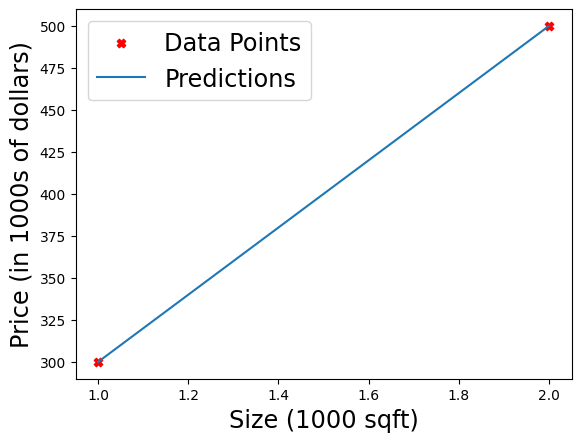

In [10]:
# plot the predictions


plt.scatter(X_train, Y_train, marker = 'X', c = 'r', label = "Data Points")
plt.legend(fontsize = "xx-large")

plt.plot(X_train, prediction_tf, label = "Predictions"); # replace prediction_tf with  prediction_np to get the numpy preditictions graph
plt.legend(fontsize = "xx-large");

plt.ylabel("Price (in 1000s of dollars)", fontsize = "xx-large");
plt.xlabel("Size (1000 sqft)", fontsize = "xx-large");

plt.show()

> ### Neuron with sigmoid function

In [11]:

X_train = np.array([0, 1, 2, 3, 4, 5], dtype = np.float32).reshape(-1, 1); # 6 samples and 1 feature -1 get the last element (represent total samples) and (1 = feature)
Y_train = np.array([0, 0, 0, 1, 1, 1], dtype = np.float32).reshape(-1, 1);

X_train, Y_train

(array([[0.],
        [1.],
        [2.],
        [3.],
        [4.],
        [5.]], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]], dtype=float32))

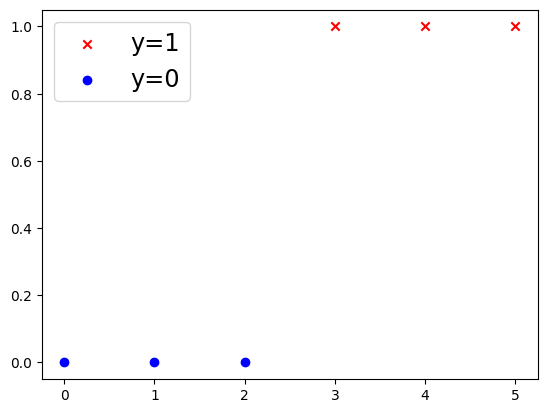

In [12]:
pos = Y_train == 1
neg = Y_train == 0

plt.scatter(X_train[pos], Y_train[pos], marker = 'x', c = 'r', label = "y=1");
plt.scatter(X_train[neg], Y_train[neg], marker = 'o', c = 'blue', label = "y=0");

plt.legend(fontsize = "xx-large");

plt.show();

In [13]:
# model

model = tf.keras.Sequential([

    tf.keras.layers.Dense(1, input_dim = 1, activation = "sigmoid", name = "L1")
])

C:\Users\Salma\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
logistic_layer = model.get_layer('L1');
w, b = logistic_layer.get_weights()

print(w, b);
print(w.shape, b.shape);

[[0.8279923]] [0.]
(1, 1) (1,)


In [16]:
set_w = np.array([[2]]);
set_b = np.array([-4.5]);

logistic_layer.set_weights([set_w, set_b]);
print(logistic_layer.get_weights());

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [17]:
a1 = model.predict(X_train[0].reshape(1, 1));
print(a1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
[[0.01098694]]


In [18]:
a1 = model.predict(X_train);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


In [19]:
a1

array([[0.01098694],
       [0.07585818],
       [0.37754065],
       [0.8175745 ],
       [0.97068775],
       [0.99592984]], dtype=float32)